# Charger les données

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
'FDS = Fragrantica Data Set'
FDS = pd.read_csv('Fragrantica_dataset.csv')

'''ATTENTION: Ici on prend uniquement un petit sample du dataset pour
pouvoir le manipuler plus facilement.'''
#FDS = FDS.sample(100, random_state=1)
FDS.head()

,nom_parfum,marque,nose,launch_year,rating_value,rating_count,main_accords,gender,longevity,sillage,price_feeling,top_notes,middle_notes,base_notes,url
0,#Cool Vibes,Zara,NaN,2020.0,4.23,13,"['vanilla', 'fruity', 'sweet', 'citrus', 'powd...",female,very weak,NaN,ok,[],[],[],https://www.fragrantica.com/perfume/Zara/Cool-...
1,#Weekend Plan,Zara,NaN,2020.0,4.33,3,"['citrus', 'floral', 'fresh spicy', 'vanilla',...",NaN,NaN,NaN,NaN,[],[],[],https://www.fragrantica.com/perfume/Zara/Weeke...
2,01 Magic Onsen,Zara,NaN,2017.0,3.29,38,"['musky', 'white floral', 'woody', 'powdery', ...",NaN,very weak,intimate,NaN,[],[],[],https://www.fragrantica.com/perfume/Zara/01-Ma...
3,02 Sweet Vanilla,Zara,NaN,2017.0,3.93,127,"['fruity', 'powdery', 'vanilla', 'woody', 'swe...",female,moderate,average,good value,"['Chestnut', 'Almond']",['Caramel'],"['Cedar', 'Vanilla', 'Musk']",https://www.fragrantica.com/perfume/Zara/02-Sw...
4,Amber Vanilla,Zara,NaN,NaN,4.23,35,"['amber', 'vanilla', 'powdery']",NaN,long lasting,average,NaN,[],[],[],https://www.fragrantica.com/perfume/Zara/Amber...


# Nettoyage données

On veut que rating_count soit un entier

In [16]:
FDS['rating_count'] = FDS['rating_count'].fillna(0)
FDS['rating_count'] = FDS['rating_count'].astype(str).str.replace(',', '').str.replace('.0', '')
FDS['rating_count'] = FDS['rating_count'].astype(int)

## Gestion données manquantes

In [17]:
# Détection des valeurs manquantes et proportion de valeurs manquantes
print(f"Valeurs manquantes = {FDS.isnull().sum()}")
pourcentage = FDS.isnull().sum() / FDS.shape[0] * 100
print(f"Pourcentage de valeurs manquantes = {pourcentage} %")
# Pour l'instant on garde tout


Valeurs manquantes = nom_parfum           0
marque               0
nose             12523
launch_year       1920
rating_value       687
rating_count         0
main_accords         0
gender            6835
longevity         4843
sillage           4237
price_feeling     7393
top_notes            0
middle_notes         0
base_notes           0
url                  0
dtype: int64
Pourcentage de valeurs manquantes = nom_parfum        0.000000
marque            0.000000
nose             57.502985
launch_year       8.816237
rating_value      3.154560
rating_count      0.000000
main_accords      0.000000
gender           31.384884
longevity        22.238038
sillage          19.455414
price_feeling    33.947103
top_notes         0.000000
middle_notes      0.000000
base_notes        0.000000
url               0.000000
dtype: float64 %


**Il y 1920 années de lancement manquantes** ce n'est pas un pb de scrapping mais bien d'info manquante sur le site

In [18]:
# Affichons quelques parfums ou lunch_year est manquant
annee_manquante = FDS[FDS['launch_year'].isnull()]
#annee_manquante.to_csv('annee_manquante.csv', index=False)


## Autres modifications

**Doublons**

In [19]:
#Repérage des doublons
print(f"Nombre de doublons = {FDS['url'].duplicated().sum()}")


Nombre de doublons = 0


**mettre nom des varialbes an anglais**

In [20]:
# On met tous les nomq de variables en anglais
FDS = FDS.rename(columns={'marque': 'brand'})
FDS = FDS.rename(columns={'nom_parfum': 'name'})

Mettre les 'nose' vide en str

In [21]:
# Transformer toute la colonne 'nose' en type str
FDS['nose'] = FDS['nose'].astype(str)

# Transformation données

## Regrouper les modalités rares de brand et nose dans (« Autres »)

On garde les **20** premiers

In [22]:
def keep_top_k(series, k=20):
    top = series.value_counts().nlargest(k).index
    return series.where(series.isin(top), other="Other")
FDS["brand_reduce"] = keep_top_k(FDS["brand"], 20)
FDS["nose_reduce"]   = keep_top_k(FDS["nose"],   20)

FDS.head()


,name,brand,nose,launch_year,rating_value,rating_count,main_accords,gender,longevity,sillage,price_feeling,top_notes,middle_notes,base_notes,url,brand_reduce,nose_reduce
0,#Cool Vibes,Zara,nan,2020.0,4.23,13,"['vanilla', 'fruity', 'sweet', 'citrus', 'powd...",female,very weak,NaN,ok,[],[],[],https://www.fragrantica.com/perfume/Zara/Cool-...,Zara,nan
1,#Weekend Plan,Zara,nan,2020.0,4.33,3,"['citrus', 'floral', 'fresh spicy', 'vanilla',...",NaN,NaN,NaN,NaN,[],[],[],https://www.fragrantica.com/perfume/Zara/Weeke...,Zara,nan
2,01 Magic Onsen,Zara,nan,2017.0,3.29,38,"['musky', 'white floral', 'woody', 'powdery', ...",NaN,very weak,intimate,NaN,[],[],[],https://www.fragrantica.com/perfume/Zara/01-Ma...,Zara,nan
3,02 Sweet Vanilla,Zara,nan,2017.0,3.93,127,"['fruity', 'powdery', 'vanilla', 'woody', 'swe...",female,moderate,average,good value,"['Chestnut', 'Almond']",['Caramel'],"['Cedar', 'Vanilla', 'Musk']",https://www.fragrantica.com/perfume/Zara/02-Sw...,Zara,nan
4,Amber Vanilla,Zara,nan,NaN,4.23,35,"['amber', 'vanilla', 'powdery']",NaN,long lasting,average,NaN,[],[],[],https://www.fragrantica.com/perfume/Zara/Amber...,Zara,nan


##  Segmentation des variables numériques
   - Séparer l’année de lancement en périodes (ex. avant 2000, 2000-2010, etc.) pour des analyses comparatives.
   - Catégoriser ou agréger certaines variables si elles sont trop granulaires.

In [23]:
# name --> OK
# brand --> Segmentention possibles : , par nombre de parfum, Par popularité, par type de parfum, par genre, par prix, ...
# nose --> Segmentation possibles : par nombre de parfum, par popularité, par genre, par prix, ...

#launch_year --> Créer une variable 'launch_period' par groupe de 5 année
FDS['launch_period'] = pd.cut(FDS['launch_year'],
                              bins=[1900, 1995,2000,2005,2010,2015,2020,2030],
                              labels=['Avant 1995', '1995-2000', '2000-2005', '2005-2010', '2010-2015', '2015-2020', 'Après 2020'])

# rating value --> Créer une variable 'rating_category' en 3 catégories || On sépare après avoir regardé distrubtion des notes
FDS['rating_value_category'] = pd.cut(FDS['rating_value'],
                                bins=[0, 3.3, 3.9, 4.2, 4.5, 5],
                                labels=['Très faible [0 , 3.3]', 'Faible ]3.3 , 3.9]', 'Moyenne ]3.9 , 4.2]', 'Elevée ]4.2 , 4.5]', 'Excellente ]4.5 , 5]'])

# rating count --> Pour créer une variable POPULARITY
FDS['rating_count_category'] = pd.cut(FDS['rating_count'],
                           bins=[0, 50, 200, 1000, 3000, 300000],
                           labels=['Très faible (<50 votes)', 'Faible ]50 , 200] votes', 'Moyenne ]200 , 1000] votes', 'Elevée ]1000 , 3000] votes', 'Excellente (>3000 votes]'])


# main_accord --> Sous forme de liste donc + difficile à segmenter
# gender --> OK
# sillage --> OK
# longevity --> OK
# price_feeling --> OK
# top_notes --> Sous forme de liste donc + difficile à segmenter
# heart_notes --> Sous forme de liste donc + difficile à segmenter
# base_notes --> Sous forme de liste donc + difficile à segmenter
# url --> OK

#On remet la colonne 'url' à la fin
# Déplacer la colonne 'url' à la fin
cols = [col for col in FDS.columns if col != 'url'] + ['url']
FDS = FDS[cols]



## **DESACTIVE** Standardiser / scaler les variables numériques

In [24]:
from sklearn.preprocessing import StandardScaler
'''
num_cols = ["launch_year", "rating_value", "rating_count"]
scaler = StandardScaler()

# Appliquer le scaler et ajouter les colonnes scalées avec un suffixe
scaled_cols = scaler.fit_transform(FDS[num_cols])
scaled_df = pd.DataFrame(scaled_cols, columns=[f"{col}_scaled" for col in num_cols], index=FDS.index)

# Concaténer les colonnes scalées au DataFrame original
FDS = pd.concat([FDS, scaled_df], axis=1)
'''

'\nnum_cols = ["launch_year", "rating_value", "rating_count"]\nscaler = StandardScaler()\n\n# Appliquer le scaler et ajouter les colonnes scalées avec un suffixe\nscaled_cols = scaler.fit_transform(FDS[num_cols])\nscaled_df = pd.DataFrame(scaled_cols, columns=[f"{col}_scaled" for col in num_cols], index=FDS.index)\n\n# Concaténer les colonnes scalées au DataFrame original\nFDS = pd.concat([FDS, scaled_df], axis=1)\n'

## One-hot / label encoding des variables catégorielles simples 

**"gender", "longevity", "sillage", "price_feeling", "launch_period","rating_category","popularity"**

In [25]:
from sklearn.preprocessing import OneHotEncoder

simple_cat = ["gender", "longevity", "sillage", "price_feeling", "launch_period","rating_value_category","rating_count_category"]
ohe = OneHotEncoder(sparse_output=False, drop="first")          # drop pour éviter la colinéarité
ohe_mat = ohe.fit_transform(FDS[simple_cat])
ohe_FDS  = pd.DataFrame(ohe_mat, columns=ohe.get_feature_names_out(simple_cat), index=FDS.index)

FDS = pd.concat([FDS, ohe_FDS], axis=1)

# Liste des variables actuelles
new_vars = ['gender_male', 'gender_unisex', 'gender_nan', 'longevity_long lasting',
            'longevity_moderate', 'longevity_very weak', 'longevity_weak', 'longevity_nan',
            'sillage_enormous', 'sillage_intimate', 'sillage_strong', 'sillage_nan',
            'price_feeling_great value', 'price_feeling_ok', 'price_feeling_overpriced',
            'price_feeling_way overpriced', 'price_feeling_nan', 'launch_period_2000-2005',
            'launch_period_2005-2010', 'launch_period_2010-2015', 'launch_period_2015-2020',
            'launch_period_Après 2020', 'launch_period_Avant 1995', 'launch_period_nan',
            'rating_value_category_Excellente ]4.5 , 5]', 'rating_value_category_Faible ]3.3 , 3.9]',
            'rating_value_category_Moyenne ]3.9 , 4.2]', 'rating_value_category_Très faible [0 , 3.3]',
            'rating_value_category_nan', 'rating_count_category_Excellente (>3000 votes]',
            'rating_count_category_Faible ]50 , 200] votes', 'rating_count_category_Moyenne ]200 , 1000] votes',
            'rating_count_category_Très faible (<50 votes)', 'rating_count_category_nan']

# Renommer les variables
new_vars_renamed = [
    "ohe_" + var.replace("launch_period", "LP")
                 .replace("rating_value_category", "RVC")
                 .replace("rating_count_category", "RCC")
    for var in new_vars
]

# Afficher les nouvelles variables
print("Noms des variables renommées :", new_vars_renamed)

# Renommer les colonnes dans le DataFrame
FDS.rename(columns=dict(zip(new_vars, new_vars_renamed)), inplace=True)


Noms des variables renommées : ['ohe_gender_male', 'ohe_gender_unisex', 'ohe_gender_nan', 'ohe_longevity_long lasting', 'ohe_longevity_moderate', 'ohe_longevity_very weak', 'ohe_longevity_weak', 'ohe_longevity_nan', 'ohe_sillage_enormous', 'ohe_sillage_intimate', 'ohe_sillage_strong', 'ohe_sillage_nan', 'ohe_price_feeling_great value', 'ohe_price_feeling_ok', 'ohe_price_feeling_overpriced', 'ohe_price_feeling_way overpriced', 'ohe_price_feeling_nan', 'ohe_LP_2000-2005', 'ohe_LP_2005-2010', 'ohe_LP_2010-2015', 'ohe_LP_2015-2020', 'ohe_LP_Après 2020', 'ohe_LP_Avant 1995', 'ohe_LP_nan', 'ohe_RVC_Excellente ]4.5 , 5]', 'ohe_RVC_Faible ]3.3 , 3.9]', 'ohe_RVC_Moyenne ]3.9 , 4.2]', 'ohe_RVC_Très faible [0 , 3.3]', 'ohe_RVC_nan', 'ohe_RCC_Excellente (>3000 votes]', 'ohe_RCC_Faible ]50 , 200] votes', 'ohe_RCC_Moyenne ]200 , 1000] votes', 'ohe_RCC_Très faible (<50 votes)', 'ohe_RCC_nan']


**Nombre de variables ajoutées** : gender (3), longevity (5), sillage (4), price_feeling (5), launch_period (7), rvc (5), rcc (5)   **--> 34 nouvelles variables**

## **MultiLabelBinarizer** des variables main_accord, top_note, middle_note, base_note)

main_accord, top_notes, middle_notes, base_notes

### Convertir en liste

*Avant modifs* :

Nombre de main accords unique = 84

Nombre de top notes unique = 1024

Nombre de middle notes unique = 1138

Nombre de base notes unique = 772

In [58]:
import ast

# convertir en vraie liste
FDS["main_accords_list"] = FDS["main_accords"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else [])
# Convertir en vraies listes pour top_notes, middle_notes, et base_notes
FDS["top_notes_list"] = FDS["top_notes"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else [])
FDS["middle_notes_list"] = FDS["middle_notes"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else [])
FDS["base_notes_list"] = FDS["base_notes"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else [])


# print du nombre de main accords unique
print(f"Nombre de main accords unique = {FDS['main_accords_list'].explode().nunique()}")
# print du nombre de  top/ middle / base notes unique
print(f"Nombre de top notes unique = {FDS['top_notes_list'].explode().nunique()}")
print(f"Nombre de middle notes unique = {FDS['middle_notes_list'].explode().nunique()}")
print(f"Nombre de base notes unique = {FDS['base_notes_list'].explode().nunique()}")

Nombre de main accords unique = 84
Nombre de top notes unique = 1024
Nombre de middle notes unique = 1138
Nombre de base notes unique = 772


### Modification à la main (connaissance métier)

#### **Comprendre comment sont les listes pour pourvoir les modifier de la bonne façon**

In [27]:
MA_list = [accord for accord in FDS['main_accords_list'].explode().unique() if isinstance(accord, str)]
TN_list = [note for note in FDS['top_notes_list'].explode().unique() if isinstance(note, str)]
MN_list = [note for note in FDS['middle_notes_list'].explode().unique() if isinstance(note, str)]
BN_list = [note for note in FDS['base_notes_list'].explode().unique() if isinstance(note, str)]

# Trier par ordre alphabétique
MA_list.sort()
TN_list.sort()
MN_list.sort()
BN_list.sort()


# mettre chaque list dans un csv
pd.DataFrame(MA_list, columns=['main_accords']).to_csv('main_accords.csv', index=False)
pd.DataFrame(TN_list, columns=['top_notes']).to_csv('top_notes.csv', index=False)
pd.DataFrame(MN_list, columns=['middle_notes']).to_csv('middle_notes.csv', index=False)
pd.DataFrame(BN_list, columns=['base_notes']).to_csv('base_notes.csv', index=False)

# Analyse Top notes
substrings = [
    'Almond', 'Bamboo', 'Basil', 'Cardamom', 'Citrus', 'Coconut', 'Elemi', 
    'Fig', 'Geranium', 'Ginger', 'Grapefruit', 'Iris', 'Lily', 'Mandarin', 
    'Nectarine', 'Orange', 'Patchouli', 'Pine', 'Plum', 'Tea', 'Tonka'
]
for substring in substrings:
    for element in TN_list:
        if substring in element:
            print(element)


Almond
Almond Blossom
Almond Milk
Bitter Almond
Candied Almond
Confetti (Sugared Almonds)
Fresh Almond
Green Almond
Sweet Almond
Bamboo
Bamboo Leaf
Basil
Basil Leaf
Black Cardamom
Cardamom
Guatemalan Cardamom
Citrus
Citrus Blossom
Citrus Leaf
Citrus Leaves
Citrus and Floral Notes
Citruses
Citruses Water
Japanese Citruses
Sicilian Citruses
Coconut
Coconut Blossom
Coconut Milk
Coconut Nectar
Coconut Powder
Coconut Water
Elemi resin
Californian Fig
Fig
Fig Blossom
Fig Leaf
Fig Nectar
Fig Tree
Fig Wood Bark
African Geranium
Bourbon Geranium
Geranium
Rose Geranium
African Ginger
Candied Ginger
Ginger
Ginger flower
Gingerbread
Indian Ginger
Nigerian Ginger
White Ginger
White Ginger Lily
Blood Grapefruit
Chinese Grapefruit
Florida Grapefruit
Grapefruit
Grapefruit blossom
Pink Grapefruit
White Grapefruit
Black Iris
Iris
Iris Flower
Iris Petals
Iris leaf
Italian Iris
Tuscan Iris
White Iris
Arum Lily
Casablanca Lily
Green Lily
Lily
Lily of the Valley
Lily-of-the-Valley
Lilybelle®
Royal Lily
Wate

*Observations :*

- Problème de casse

- Main accord : rien à changer, regrouper, ...

- Top notes : 
    
    Supprimer : 

    TOUT : 'African ', 'Blue ', 'Blood ', 'Brazilian ', 'Bourbon ', 'Calabrian ', ' Seed', ' Seeds', ' Leaf', 'Sicilian ',
    
    CERTAINS : 'Red' (Apple, Litchi, Mandarin, Peach, Rose, Sandalwood, Tea, Turkey Rose), 'Sweet' (orange et pea) , 'White ' (Bergamot, Grapefruit, Honey, Iris, Oud, Peach, Pear, Rose, Rum, Tea,) , 'Yellow ' (Mandarin, Plum)
    
almond, bamboo, basil, orange, iris, geranium, Grapefruit, ginger
Mandarin
Orange
regrouper pine plum tea tonka citrus coconut elemi fig cardamom lily nectarine pathouli pine

cardamon = cardamom

#### Simplication par valeurs unique

**Simplification Top Note**

In [28]:
TN_list = [note for note in FDS['top_notes_list'].explode().unique() if isinstance(note, str)]
TN_list.sort()


print(f"Avant modification il y avait {len(TN_list)} top notes")

# Supprimer certains mots de la liste top notes
mot_a_supprimer = ['African ', 'Blue ', 'Blood ', 'Brazilian ', 'Bourbon ', 'Calabrian ', 'Californian ',
                    'Cambodian ', 'Chinese ', 'Damask ', 'Frosted ', 'French ', 'Green ', 'Indian ',
                    'Italian ', 'Japanese ', 'Pink ' ' Seed', ' Seeds',
                    ' Leaf', 'Sicilian ', 'Wild ']
for i in range(len(TN_list)):
    for mot in mot_a_supprimer:
        if mot in TN_list[i]:
            TN_list[i] = TN_list[i].replace(mot, '')


# Remplacer certaines erreurs de frappe
for i in range(len(TN_list)):
    if 'Cardamon' in TN_list[i]:
        TN_list[i] = TN_list[i].replace('Cardamon', 'Cardamom')
    if 'Citron' in TN_list[i]:
        TN_list[i] = TN_list[i].replace('Citron', 'Lemon')
    if 'Citrus' in TN_list[i]:
        TN_list[i] = TN_list[i].replace('Citrus', 'Lemon')
    if 'Citruses' in TN_list[i]:
        TN_list[i] = TN_list[i].replace('Citruses', 'Lemon')
    if 'Graperfuit' in TN_list[i]:
        TN_list[i] = TN_list[i].replace('Graperfuit', 'Grapefruit')
    if 'Lychee' in TN_list[i]:
        TN_list[i] = TN_list[i].replace('Lychee', 'Litchi')
    if 'Orris' in TN_list[i]:
        TN_list[i] = TN_list[i].replace('Orris', 'Iris')
    if 'Vanille' in TN_list[i]:
        TN_list[i] = TN_list[i].replace('Vanille', 'Vanilla')

    
# Fonction pour filtrer les éléments
def filter_notes(note_list):
    filtered_list = []
    red_words = ['Apple', 'Litchi', 'Mandarin', 'Peach', 'Rose', 'Sandalwood', 'Tea', 'Turkey Rose']
    sweet_words = ['Orange', 'Pea']
    white_words = ['Bergamot', 'Grapefruit', 'Honey', 'Iris', 'Oud', 'Peach', 'Pear', 'Rose', 'Rum', 'Tea']
    yellow_words = ['Mandarin', 'Plum']
    for note in note_list:
        if 'Red ' in note and any(word in note for word in red_words):
            note = note.replace('Red ', '')
        if 'Sweet ' in note and any(word in note for word in sweet_words):
            note = note.replace('Sweet ', '')
        if 'White ' in note and any(word in note for word in white_words):
            note = note.replace('White ', '')
        if 'Yellow ' in note and any(word in note for word in yellow_words):
            note = note.replace('Yellow ', '')
        filtered_list.append(note)
    return filtered_list
# Appliquer le filtre à TN_list
TN_list = filter_notes(TN_list)

# Regrouper certains notes
mots_a_regrouper =[ 'Agarwood',
    'Almond', 'Bamboo', 'Basil', 'Cardamom', 'Citrus', 'Coconut', 'Elemi', 
    'Fig', 'Geranium', 'Ginger', 'Grapefruit', 'Iris', 'Lily', 'Mandarin', 
    'Nectarine', 'Orange', 'Patchouli', 'Pine', 'Plum', 'Tea', 'Tonka'
]
for i in range(len(TN_list)):
    for mot in mots_a_regrouper:
        if mot in TN_list[i]:
            TN_list[i] = mot

# Tout mettre en Title Case
TN_list = [note.title() for note in TN_list]

# Supprimer les doublons
TN_list = list(set(TN_list))


print(f"Apres filtrage il y a {len(TN_list)} top notes")

# Afficher la liste mise à jour
TN_list.sort()
print("Liste mise à jour des top notes :\n")
for note in TN_list:
    print(note)


pd.DataFrame(TN_list, columns=['top_notes']).to_csv('top_notes.csv', index=False)

Avant modification il y avait 1024 top notes
Apres filtrage il y a 788 top notes
Liste mise à jour des top notes :

Absinthe
Acai Berry
Accord
Acerola
Acetylfuran
Acácia
Agarwood
Agave
Akigalawood
Aldehydes
Allspice
Almond
Aloe Vera
Amalfi Lemon
Amaretto
Amaryllis
Amber
Amber Xtreme
Ambergris
Amberwood
Ambrette
Ambrette (Musk Mallow)
Ambrinol
Ambrocenide
Ambrox Super
Ambroxan
Amyl Salicylate
Amyris
Angelica
Angelica Root
Animal Notes
Anise
Anjou Pears
Antillone™
Apple
Apple Blossom
Apple Juice
Apple Shisha Accord
Applejack
Apricot
Apricot Blossom
Aqual
Aquatic Notes
Aquozone
Argentinian Lemon
Aromatic Notes
Aromatic Spices
Artemisia
Artichoke
Asafoetida
Atlas Cedar
Australian Sandalwood
Baie Rose
Balsam Fir
Balsamic Vinegar
Bamboo
Banana
Banana Flower
Barberry
Bark
Basil
Bay
Bay Essence
Beachheather
Bearberry
Beech
Beeswax
Beetroot
Belanis
Bellflower
Bellini
Bengal Pepper
Benzoin
Bergamot
Bergamot Blossom
Berries
Berry Fruits
Betel Pepper
Big Strawberry
Bigarade
Birch
Biscuit
Black Amb

#### Appliquer les modifications faites sur TN_list, MN_list et BN_list au dataset FDS

**Top notes**

In [14]:
# Fonction pour nettoyer une liste de top notes
def clean_top_notes(notes_list):
    if not isinstance(notes_list, list):
        return []
    
    # Supprimer certains mots
    mot_a_supprimer = ['African ', 'Blue ', 'Blood ', 'Brazilian ', 'Bourbon ', 'Calabrian ', 'Californian ',
                       'Cambodian ', 'Chinese ', 'Damask ', 'Frosted ', 'French ', 'Green ', 'Indian ',
                       'Italian ', 'Japanese ', 'Pink ' ' Seed', ' Seeds', ' Leaf', 'Sicilian ', 'Wild ']
    for i in range(len(notes_list)):
        for mot in mot_a_supprimer:
            if mot in notes_list[i]:
                notes_list[i] = notes_list[i].replace(mot, '')

    # Remplacer certaines erreurs de frappe
    corrections = {
        'Cardamon': 'Cardamom',
        'Citron': 'Lemon',
        'Citruses': 'Lemon',
        'Citrus': 'Lemon',
        'Citruses': 'Lemon',
        'Graperfuit': 'Grapefruit',
        'Lychee': 'Litchi',
        'Orris': 'Iris',
        'Vanille': 'Vanilla'
    }
    for i in range(len(notes_list)):
        for wrong, correct in corrections.items():
            if wrong in notes_list[i]:
                notes_list[i] = notes_list[i].replace(wrong, correct)

    # Filtrer les éléments
    filtered_list = []
    red_words = ['Apple', 'Litchi', 'Mandarin', 'Peach', 'Rose', 'Sandalwood', 'Tea', 'Turkey Rose']
    sweet_words = ['Orange', 'Pea']
    white_words = ['Bergamot', 'Grapefruit', 'Honey', 'Iris', 'Oud', 'Peach', 'Pear', 'Rose', 'Rum', 'Tea']
    yellow_words = ['Mandarin', 'Plum']
    for note in notes_list:
        if 'Red ' in note and any(word in note for word in red_words):
            note = note.replace('Red ', '')
        if 'Sweet ' in note and any(word in note for word in sweet_words):
            note = note.replace('Sweet ', '')
        if 'White ' in note and any(word in note for word in white_words):
            note = note.replace('White ', '')
        if 'Yellow ' in note and any(word in note for word in yellow_words):
            note = note.replace('Yellow ', '')
        filtered_list.append(note)

    # Regrouper certains mots
    mots_a_regrouper = [
        'Agarwood', 'Almond', 'Bamboo', 'Basil', 'Cardamom', 'Citrus', 'Coconut', 'Elemi',
        'Fig', 'Geranium', 'Ginger', 'Grapefruit', 'Iris', 'Lily', 'Mandarin',
        'Nectarine', 'Orange', 'Patchouli', 'Pine', 'Plum', 'Tea', 'Tonka'
    ]
    for i in range(len(filtered_list)):
        for mot in mots_a_regrouper:
            if mot in filtered_list[i]:
                filtered_list[i] = mot

    # Tout mettre en Title Case
    filtered_list = [note.title() for note in filtered_list]

    # Supprimer les doublons
    return list(set(filtered_list))

# Appliquer le nettoyage à la colonne 'top_notes_list'
FDS['top_notes_list'] = FDS['top_notes_list'].apply(clean_top_notes)


### Elimer les main_accord, top_note, middle_note, base_note aux occurrences peu nombreuses **<1 %**

- Avant :
    Nombre de main_accord unique = 84

    Nombre de top notes unique = 1024
    
    Nombre de middle notes unique = 1138
    
    Nombre de base notes unique = 772

- Après :

    Nombre de main accords unique après le filtrage = 55

    Nombre de top notes unique après le filtrage = 43

    Nombre de middle notes unique après le filtrage = 45

    Nombre de base notes unique après le filtrage = 30

**Modifications**

In [62]:
# convertir en vraie liste
FDS["main_accords_list"] = FDS["main_accords"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else [])
FDS["top_notes_list"] = FDS["top_notes"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else [])
FDS["middle_notes_list"] = FDS["middle_notes"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else [])
FDS["base_notes_list"] = FDS["base_notes"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else [])

distribution = FDS['main_accords_list'].explode().value_counts()
distribution_TN = FDS['top_notes_list'].explode().value_counts()
distribution_MN = FDS['middle_notes_list'].explode().value_counts()
distribution_BN = FDS['base_notes_list'].explode().value_counts()

nb_TN_unique = len(distribution_TN)
nb_MN_unique = len(distribution_MN)
nb_BN_unique = len(distribution_BN)
print(f"Nombre de main accords unique = {len(distribution)}")
print(f"Nombre de top notes unique = {nb_TN_unique}")
print(f"Nombre de middle notes unique = {nb_MN_unique}")
print(f"Nombre de base notes unique = {nb_BN_unique}")


# On ne garde que les notes qui représentent plus de K% des parfums
pourcentage = 0.01 # 1% des parfums

accords_a_garder = distribution[distribution > pourcentage * len(FDS)].index.tolist()
FDS['main_accords_list'] = FDS['main_accords_list'].apply(lambda x: [accord if accord in accords_a_garder else 'Accord_Rare' for accord in x])
TN_a_garder = distribution_TN[distribution_TN > pourcentage * len(FDS)].index.tolist()
FDS['top_notes_list'] = FDS['top_notes_list'].apply(lambda x: [note if note in TN_a_garder else 'Top_Notes_Rare' for note in x])
MN_a_garder = distribution_MN[distribution_MN > pourcentage * len(FDS)].index.tolist()
FDS['middle_notes_list'] = FDS['middle_notes_list'].apply(lambda x: [note if note in MN_a_garder else 'Middle_Notes_Rare' for note in x])
BN_a_garder = distribution_BN[distribution_BN > pourcentage * len(FDS)].index.tolist()
FDS['base_notes_list'] = FDS['base_notes_list'].apply(lambda x: [note if note in BN_a_garder else 'Base_Notes_Rare' for note in x])

# Compter le nombre d'occurences de chaque note après le filtrage
distribution = FDS['main_accords_list'].explode().value_counts()
distribution_TN = FDS['top_notes_list'].explode().value_counts()
distribution_MN = FDS['middle_notes_list'].explode().value_counts()
distribution_BN = FDS['base_notes_list'].explode().value_counts()
print(f"Nombre de main accords unique après le filtrage = {len(distribution)}")
print(f"Nombre de top notes unique après le filtrage = {len(distribution_TN)}")
print(f"Nombre de middle notes unique après le filtrage = {len(distribution_MN)}")
print(f"Nombre de base notes unique après le filtrage = {len(distribution_BN)}")


Nombre de main accords unique = 84
Nombre de top notes unique = 1024
Nombre de middle notes unique = 1138
Nombre de base notes unique = 772
Nombre de main accords unique après le filtrage = 54
Nombre de top notes unique après le filtrage = 42
Nombre de middle notes unique après le filtrage = 44
Nombre de base notes unique après le filtrage = 29


**Plot des nouvelles distributions**

C:\Users\tapri\AppData\Local\Temp\ipykernel_8364\2618126979.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distribution.index, y=distribution.values, palette='viridis', ax=axes[0, 0])
C:\Users\tapri\AppData\Local\Temp\ipykernel_8364\2618126979.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distribution_TN.index, y=distribution_TN.values, palette='viridis', ax=axes[0, 1])
C:\Users\tapri\AppData\Local\Temp\ipykernel_8364\2618126979.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distribution_MN.index, y=distribution_MN.va

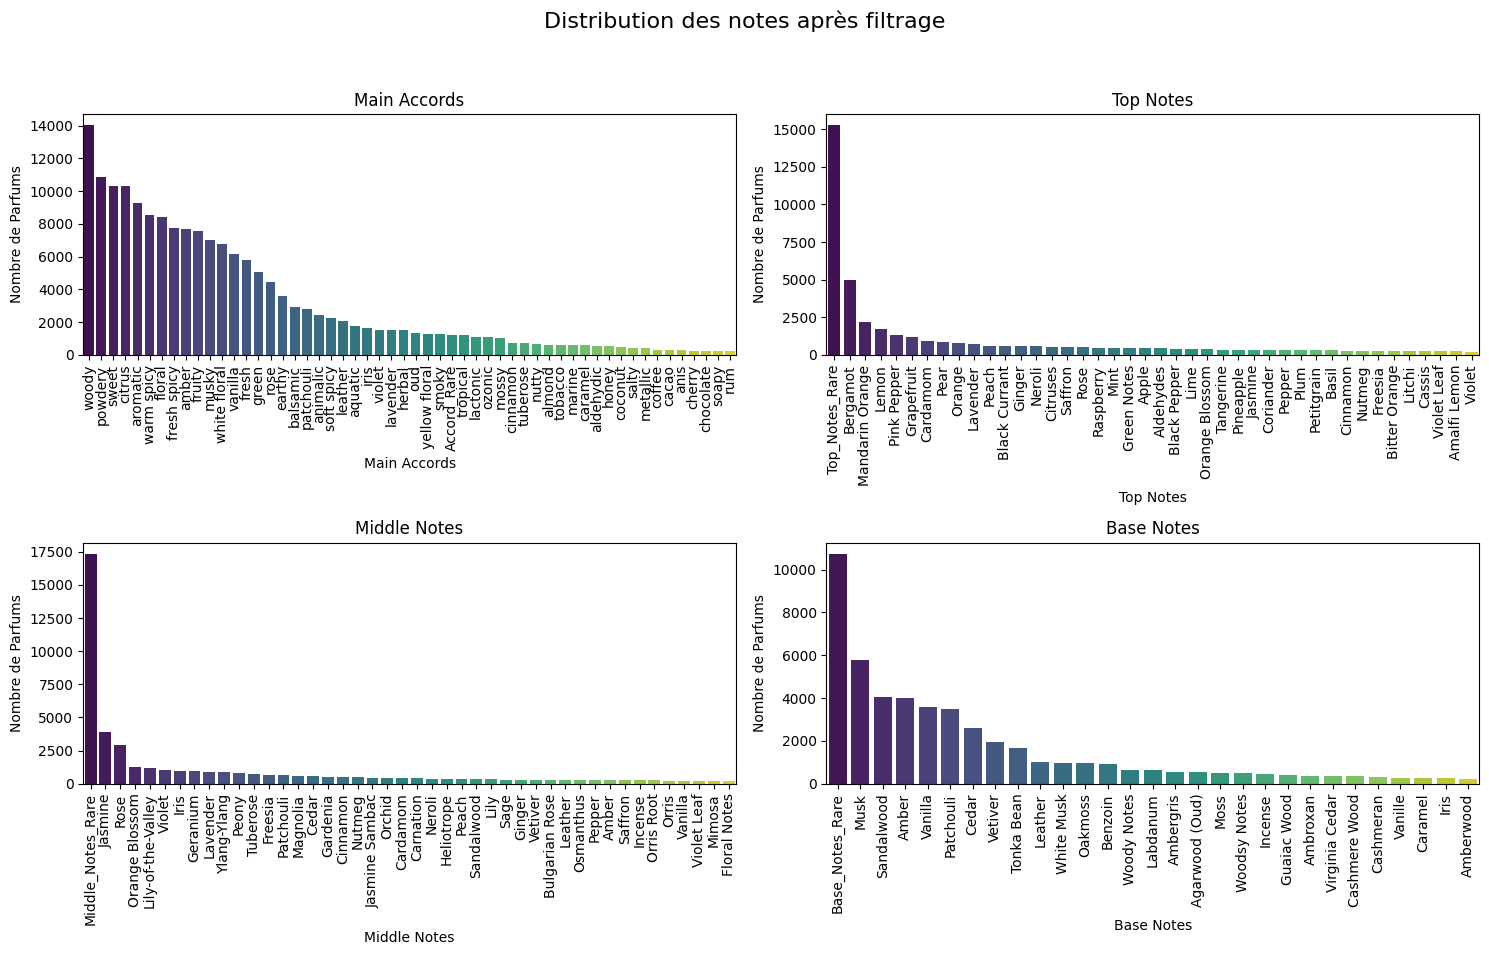

In [63]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution des notes après filtrage', fontsize=16)
# Main accords
sns.barplot(x=distribution.index, y=distribution.values, palette='viridis', ax=axes[0, 0])
axes[0, 0].set_title('Main Accords')
axes[0, 0].set_xlabel('Main Accords')
axes[0, 0].set_ylabel('Nombre de Parfums')
axes[0, 0].tick_params(axis='x', rotation=90)
# Top notes
sns.barplot(x=distribution_TN.index, y=distribution_TN.values, palette='viridis', ax=axes[0, 1])
axes[0, 1].set_title('Top Notes')
axes[0, 1].set_xlabel('Top Notes')
axes[0, 1].set_ylabel('Nombre de Parfums')
axes[0, 1].tick_params(axis='x', rotation=90)
# Middle notes
sns.barplot(x=distribution_MN.index, y=distribution_MN.values, palette='viridis', ax=axes[1, 0])
axes[1, 0].set_title('Middle Notes')
axes[1, 0].set_xlabel('Middle Notes')
axes[1, 0].set_ylabel('Nombre de Parfums')
axes[1, 0].tick_params(axis='x', rotation=90)
# Base notes
sns.barplot(x=distribution_BN.index, y=distribution_BN.values, palette='viridis', ax=axes[1, 1])
axes[1, 1].set_title('Base Notes')
axes[1, 1].set_xlabel('Base Notes')
axes[1, 1].set_ylabel('Nombre de Parfums')
axes[1, 1].tick_params(axis='x', rotation=90)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### **Encodage**

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer


mlb = MultiLabelBinarizer()

# Encodage des accords principaux
accords_encoded = pd.DataFrame(
    mlb.fit_transform(FDS["main_accords_list"]),
    columns=[f"MA_{a}" for a in mlb.classes_],
    index=FDS.index
)
# Encodage des top_notes
top_notes_encoded = pd.DataFrame(
    mlb.fit_transform(FDS["top_notes_list"]),
    columns=[f"TN_{note}" for note in mlb.classes_],
    index=FDS.index
)
# Encodage des middle_notes
middle_notes_encoded = pd.DataFrame(
    mlb.fit_transform(FDS["middle_notes_list"]),
    columns=[f"MN_{note}" for note in mlb.classes_],
    index=FDS.index
)
# Encodage des base_notes
base_notes_encoded = pd.DataFrame(
    mlb.fit_transform(FDS["base_notes_list"]),
    columns=[f"BN_{note}" for note in mlb.classes_],
    index=FDS.index
)

# Ajouter les colonnes encodées au DataFrame principal et supprimer les colonnes originales
FDS = pd.concat([FDS, accords_encoded], axis=1).drop(columns=["main_accords_list"])
FDS = pd.concat([FDS, top_notes_encoded, middle_notes_encoded, base_notes_encoded], axis=1).drop(
    columns=["top_notes_list", "middle_notes_list", "base_notes_list"]
)


Nombre de main accords unique = 56
Nombre de top notes unique = 97
Nombre de middle notes unique = 88
Nombre de base notes unique = 41


,name,brand,nose,launch_year,rating_value,rating_count,main_accords,gender,longevity,sillage,...,BN_Sandalwood,BN_Smoke,BN_Tonka Bean,BN_Vanilla,BN_Vanille,BN_Vetiver,BN_Whipped Cream,BN_White Musk,BN_Woodsy Notes,BN_Woody Notes
2526,Love Spell Radiant,Victoria's Secret,nan,2021.0,3.96,25,"['tropical', 'citrus', 'sweet', 'fruity', 'ter...",female,weak,average,...,0,0,0,0,0,0,0,0,0,0
14959,Fresh Sparkling Snow,Bath & Body Works,nan,2015.0,4.10,82,"['fresh', 'fruity', 'aquatic', 'ozonic', 'flor...",female,moderate,average,...,0,0,0,0,0,0,0,0,0,0
13474,Hugo Urban Journey,Hugo Boss,nan,2018.0,3.65,142,"['green', 'woody', 'floral', 'fresh']",male,moderate,average,...,1,0,0,0,0,0,0,0,0,0
7502,Dr. Botica Poção da Coragem,O Boticário,nan,2018.0,3.90,29,"['aromatic', 'marine', 'fresh spicy', 'woody',...",unisex,moderate,intimate,...,0,0,0,0,0,0,0,0,0,0
12542,Idylle,Guerlain,Thierry Wasser,2009.0,3.79,6705,"['white floral', 'floral', 'fresh', 'rose', 'm...",female,moderate,average,...,0,0,0,0,0,0,0,0,0,0


# Sauvegarder le jdd propre

Réorganiser les colonnes

In [67]:
# Liste des colonnes initiales
columns_order = [
    "name", "brand", "brand_reduce", "nose", "nose_reduce",
    "launch_year", "launch_period", "rating_value", 'rating_value_category', "rating_count", "rating_count_category",
    "main_accords", "gender", "longevity", "sillage", "price_feeling",
    "top_notes", "middle_notes", "base_notes", "launch_period",
    "url"
]

# Réorganiser les colonnes dans FDS
FDS = FDS[[col for col in columns_order if col in FDS.columns] + 
          [col for col in FDS.columns if col not in columns_order]]

Mettre le type string aux bonnes colonnes

In [68]:
FDS['name'] = FDS['name'].astype(str)
FDS['brand'] = FDS['brand'].astype(str)
FDS['brand_reduce'] = FDS['brand_reduce'].astype(str)
FDS['nose'] = FDS['nose'].fillna("Non connu").replace("nan", "Non connu").astype(str)
FDS['nose_reduce'] = FDS['nose_reduce'].fillna("Non connu").replace("nan", "Non connu").astype(str)


In [69]:
FDS.to_csv("FDS_clean.csv", index=False)
print("✅  Dataset nettoyé et encodé enregistré → parfums_clean.csv")


✅  Dataset nettoyé et encodé enregistré → parfums_clean.csv


**Mieux comprendre les nuvelles variables**

*Variables basiques* :
- Numériques : "launch_year", "rating_value", "rating_count"
- catégorielles : "name", "brand", "nose", "gender", "longevity", "sillage", "price_feeling"
- Listes : "main_accords", "top_notes", "middle_notes", "base_notes",
- Autres : "url"

*Variables segmentées* :
- catégorielles :"brand_reduce", "nose_reduce", "launch_period", 'rating_value_category', "rating_count_category"

*Variables encodées* :
- OHE : gender (3), longevity (5), sillage (4), price_feeling (5), launch_period (7), rvc (5), rcc (5)   **--> 34**

- Multi Encode : MA main_accord, TN top_note, MN middle_note, BN base_note 

Nombre de main accords unique = 84

Nombre de top notes unique = 1024

Nombre de middle notes unique = 1138

Nombre de base notes unique = 772